# GDP vs Life Expentacy over time Project
## Introduction
In this project I am going to explore the relationship of Gross Domestic Product (GDP) and Life Expectancy (years) for a few different countries around the world. Enfasis would on using data visualization and infrence to obtain data conclusions.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in all the nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [6]:
# Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")

print(df.head())

df.shape


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


(96, 4)

Let's further check data. First let's see unique countries and years.

In [7]:
print(df.Country.unique())
print(df.Year.unique())


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We have six countries represented in the data and years from 2000 up to 2015.

Next, we can see that the Life Expectancy column is very long. Let's rename it so it is manageble. 

In [8]:
df = df.rename({"Life expectancy at birth (years)":"LEAB"}, axis = "columns")
print(df.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


## Plots
Now let's explore the data using plots to visualize better the relationships

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

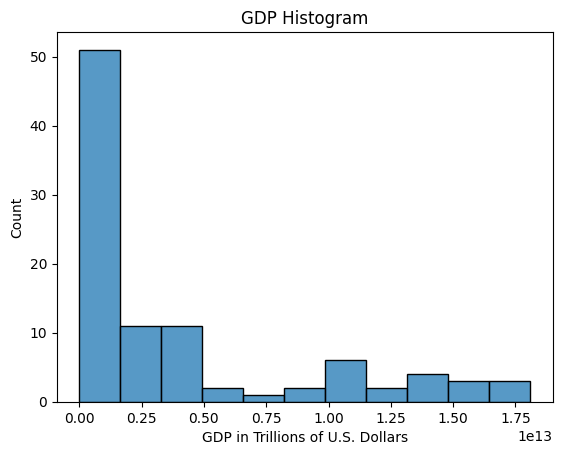

In [13]:
sns.histplot(df.GDP, kde=False)
plt.title("GDP Histogram")
plt.xlabel("GDP in Trillions of U.S. Dollars")

Text(0.5, 0, 'Life expectancy at birth (years)')

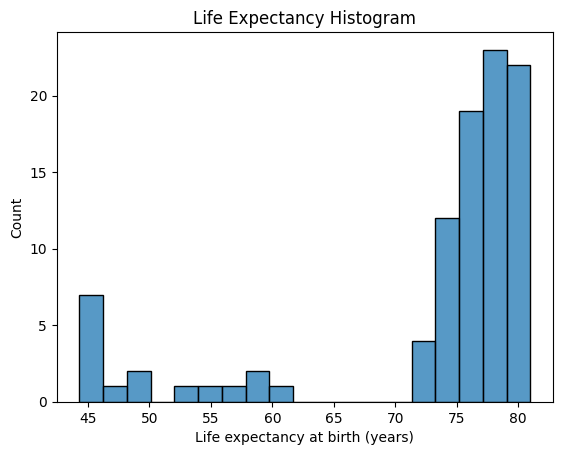

In [14]:
sns.histplot(df.LEAB, kde=False)
plt.title("Life Expectancy Histogram")
plt.xlabel("Life expectancy at birth (years)")

Find the means of Country and LEAB

In [16]:
dfMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEAB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Text(0.5, 0, 'Life expectancy at birth (years)')

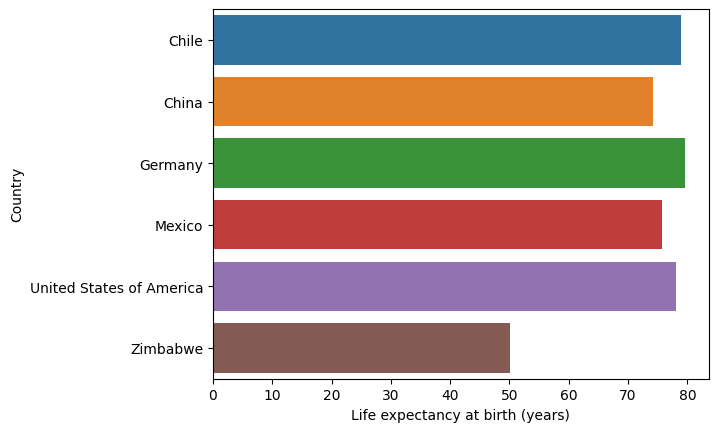

In [28]:
sns.barplot(x="LEAB", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)")



Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

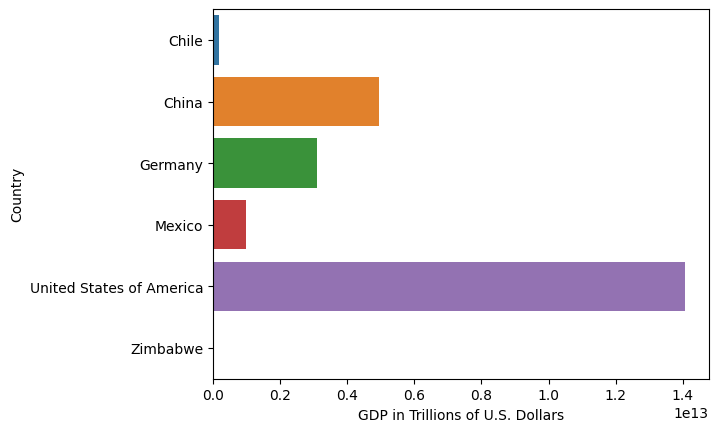

In [29]:
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars")


Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

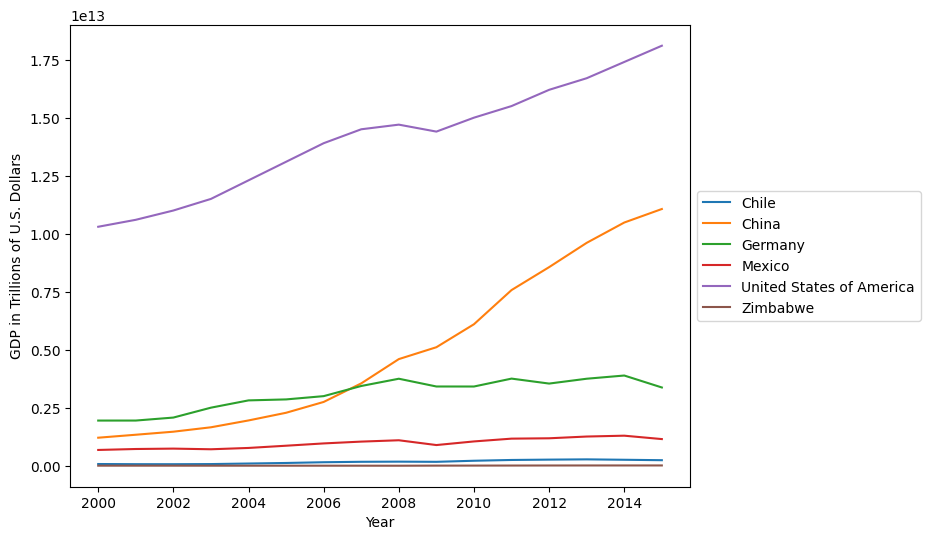

In [30]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")


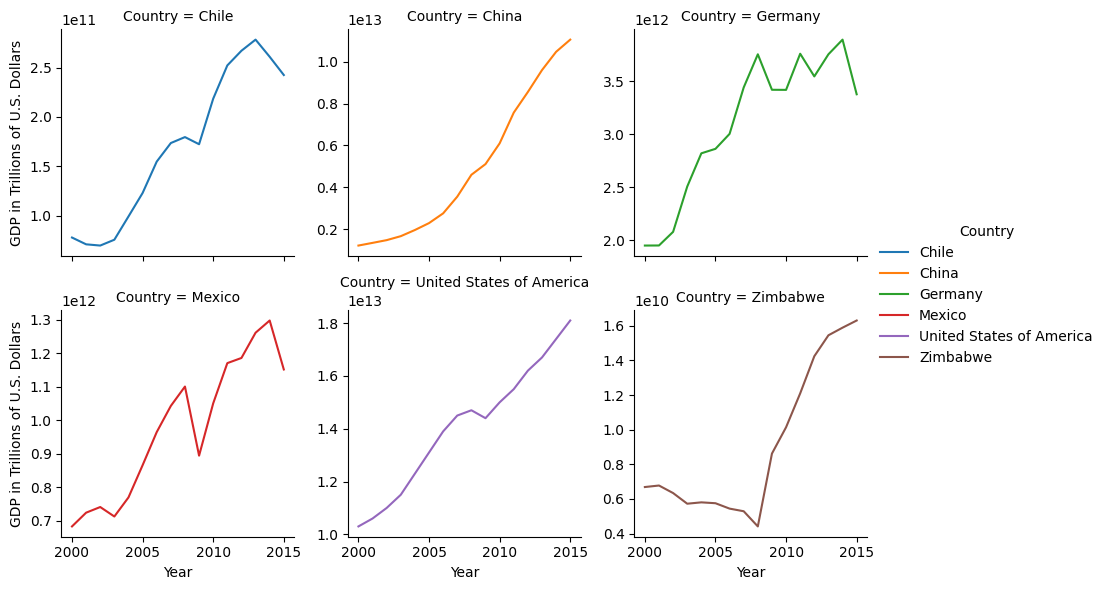

In [31]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", sharey=False)

graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP")
            .add_legend()
            .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

graphGDP


Text(0, 0.5, 'Life expectancy at birth (years)')

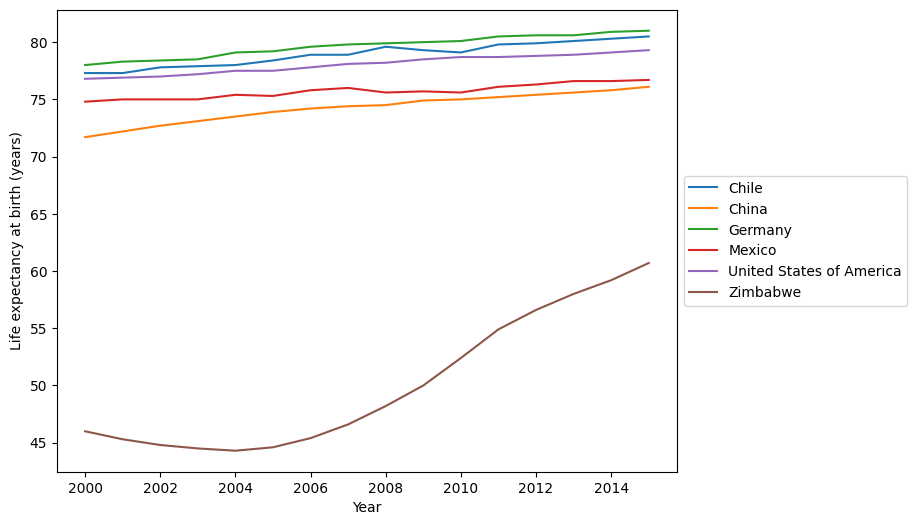

In [33]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")
